In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import FinanceDataReader as fdr

# 0. Data Import: Target & Features
- European carbon credit price(EUA future price from ICE) 
- Currency, indexes for relevant stock markets, commodities etc.
- 2015.1 ~ 2021.12 : From the ex-ante of Paris Agreement to recent
- Data downloaded by FinanceDataReader

In [2]:
# import code

In [ ]:
# currency
euro = fdr.DataReader('EUR/USD', '2015', '2022')
bcoin = fdr.DataReader('BTC/USD', '2015', '2022')

# european stock price index
euro_stox = fdr.DataReader('STOXX50', '2015','2022')
german = fdr.DataReader('DE30', '2015', '2022')
uk = fdr.DataReader('UK100', '2015','2022')
french = fdr.DataReader('FCHI', '2015','2022')

# relevant stock market
chino = fdr.DataReader('SSEC', '2015', '2022')
india = fdr.DataReader('NSEI', '2015', '2022')
brasil = fdr.DataReader('BVSP', '2015','2022')
corea = fdr.DataReader('KS11', '2015', '2022')
states = fdr.DataReader('DJI', '2015','2022')

# commodities
copper = fdr.DataReader('HG', '2015','2022')
lumber = fdr.DataReader('LBc1', '2015', '2022')
cattle = fdr.DataReader('Lcc1', '2015', '2022')
corn = fdr.DataReader('ZC', '2015','2022')
wheat = fdr.DataReader('ZW', '2015','2022')

# energy
crude = fdr.DataReader('WTI/USD', '2015','2022')
n_gas = fdr.DataReader('NG', '2015', '2022')

# the target
carbon = fdr.DataReader('CFI2Z1', '2015', '2022')

In [ ]:
# data cleaning & save as csv.

In [ ]:
for i, j in enumerate(features):
    print(ftrs[i])
    print(j.shape)
    
euro['Volume']=0
crude['Volume']=0

price = pd.DataFrame()
for i,j in enumerate(features):
    price[ftrs[i]]=j['Close']  
    
price = price.fillna(method='pad').iloc[2:]

volume = pd.DataFrame()
for i,j in enumerate(features):
    volume[ftrs[i]]=j['Volume']  
volume = volume.fillna(method='pad').iloc[2:]

volume.columns=['v_euro', 'v_bcoin', 'v_euro_stox', 'v_german', 'v_uk', 'v_french', 'v_chino',
       'v_india', 'v_brasil', 'v_corea', 'v_states', 'v_copper', 'v_lumber', 'v_cattle',
       'v_v_corn', 'v_wheat', 'v_crude', 'v_n_gas', 'v_carbon']

df = pd.merge(price, volume, left_index= True, right_index =True)
df.to_csv('carbon.csv')

# 1. Exploratory Data Analysis(EDA) for price & volume of all features
- trends and patterns
- correlation 

In [ ]:
# import the csv file

In [5]:
df=pd.read_csv('carbon.csv', index_col='Date')
df.head(2)

,euro,bcoin,euro_stox,german,uk,french,chino,india,brasil,corea,...,v_corea,v_states,v_copper,v_lumber,v_cattle,v_v_corn,v_wheat,v_crude,v_n_gas,v_carbon
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-05,1.1934,274.8,3023.14,9473.16,6417.16,4111.36,3350.52,8378.40,47517.0,1915.75,...,313440000.0,116160000.0,330.0,190.0,16540.0,140390.0,45080.0,0.0,141780.0,90.0
2015-01-06,1.1889,282.3,3007.91,9469.66,6366.51,4083.50,3351.45,8127.35,48001.0,1882.45,...,303690000.0,101870000.0,310.0,200.0,31200.0,138310.0,52460.0,0.0,111340.0,590.0


In [6]:
df.tail(2)

,euro,bcoin,euro_stox,german,uk,french,chino,india,brasil,corea,...,v_corea,v_states,v_copper,v_lumber,v_cattle,v_v_corn,v_wheat,v_crude,v_n_gas,v_carbon
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-30,1.1323,47123.3,4306.07,15884.86,7403.01,7173.23,3619.19,17203.95,104822.0,2977.65,...,461040000.0,197770000.0,330.0,100.0,470.0,122780.0,36620.0,0.0,124670.0,5020.0
2021-12-31,1.1368,46219.5,4306.07,15884.86,7384.54,7153.03,3639.78,17354.05,104822.0,2977.65,...,461040000.0,205290000.0,330.0,60.0,13980.0,122780.0,36620.0,0.0,124670.0,3690.0


In [ ]:
# price - target

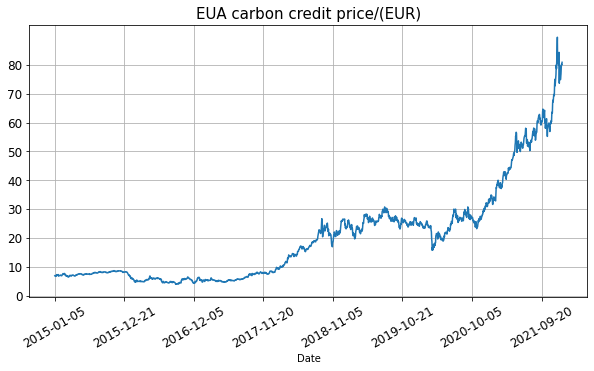

In [26]:
plt.figure(figsize=(10,5))
df['carbon'].plot()
plt.title('EUA carbon credit price/(EUR)',fontsize=15)

plt.yticks(np.arange(0,90,10), fontsize=12)
plt.xticks(rotation =30, fontsize=12)

plt.grid(which='both')
plt.show()

In [ ]:
# price - features

In [57]:
ftrs_sc = ['euro', 'bcoin', 'euro_stox', 'german', 'uk', 'french', 'chino',\
        'india', 'brasil', 'corea', 'states', 'copper', 'lumber',\
        'cattle', 'corn', 'wheat', 'crude', 'n_gas']

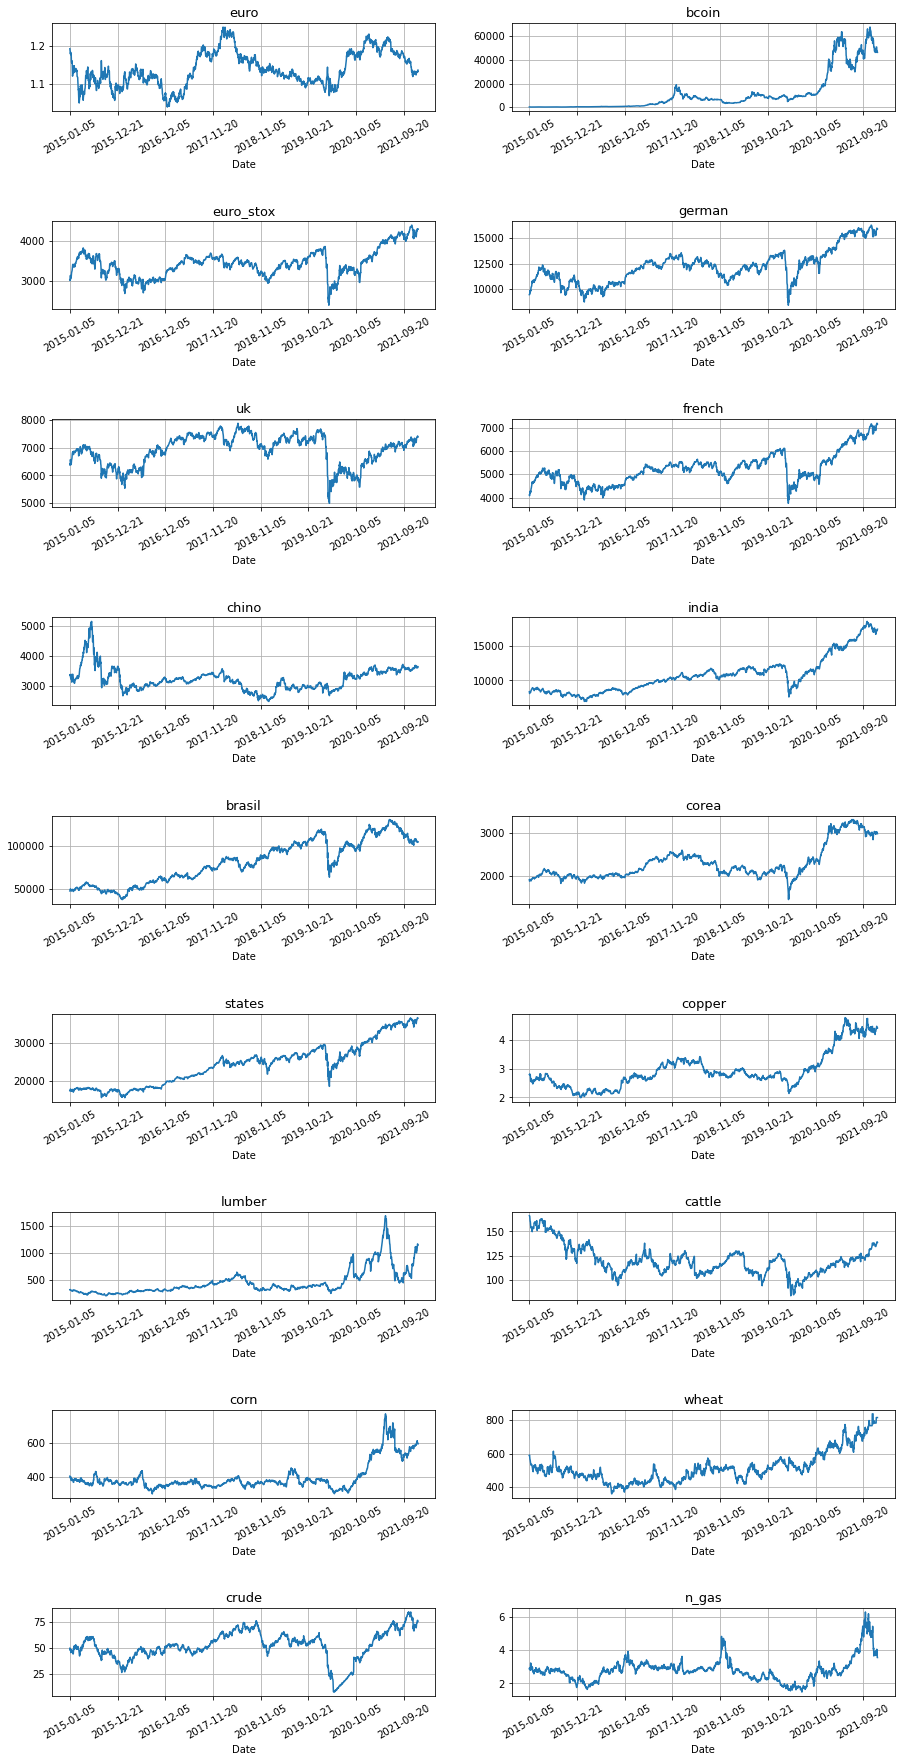

In [31]:
plt.figure(figsize =(15, 60))

for i, feature in enumerate(ftrs_sc):
    plt.subplot(18, 2, i+1)
    df[ftrs_sc[i]].plot()
    plt.title(ftrs_sc[i], fontsize=13)
    plt.grid(which='both')
    plt.xticks(rotation =30)
    
plt.subplots_adjust(left=0.12, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace= 1.25)

plt.show()

In [ ]:
# correlation in prices

In [58]:
ftrs_sc.append('carbon')
price = df[ftrs_sc]

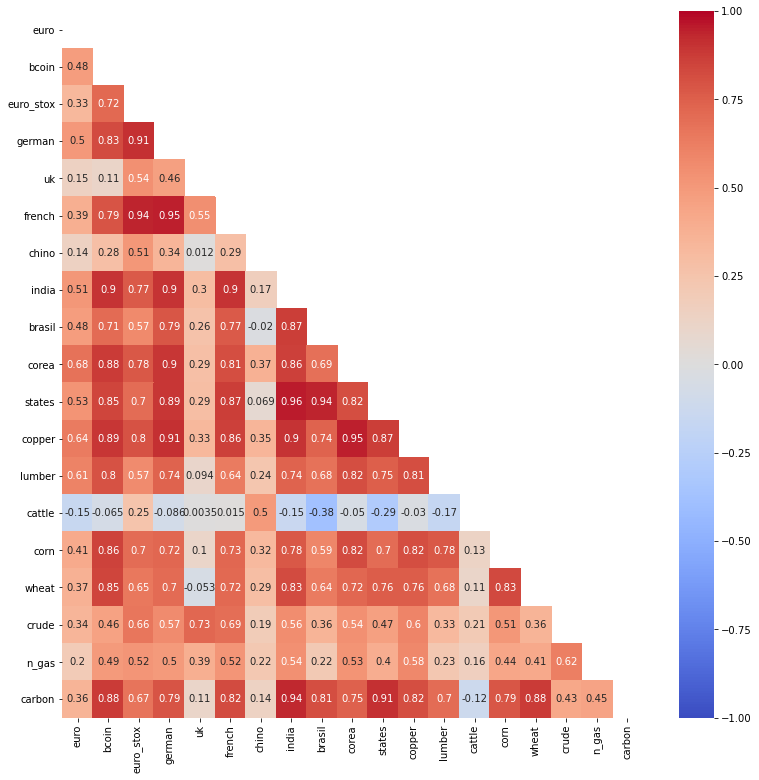

In [74]:
plt.figure(figsize =(13, 13))
upp_mat = np.triu(price.corr())
sns.heatmap(price.corr(), vmin=-1, vmax= +1, annot=True, cmap = 'coolwarm', mask = upp_mat)
plt.show()

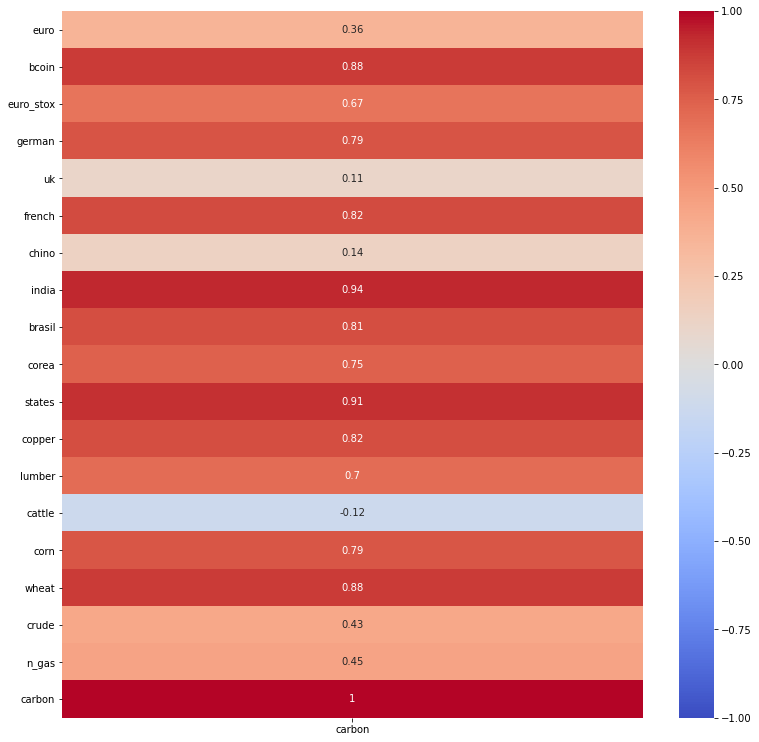

In [78]:
plt.figure(figsize =(13, 13))
sns.heatmap(price.corr()[['carbon']], vmin=-1, vmax= +1, annot=True, cmap = 'coolwarm')
plt.show()

In [ ]:
# volume - target

In [32]:
df['v_carbon'].tail()

Date
2021-12-27     3630.0
2021-12-28     4610.0
2021-12-29    10440.0
2021-12-30     5020.0
2021-12-31     3690.0
Name: v_carbon, dtype: float64

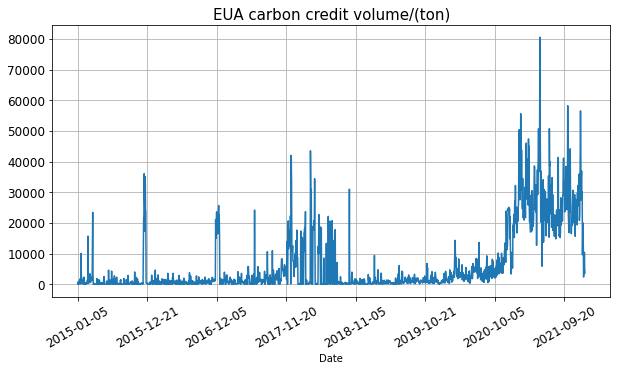

In [35]:
plt.figure(figsize=(10,5))
df['v_carbon'].plot()
plt.title('EUA carbon credit volume/(ton)',fontsize=15)

plt.yticks(np.arange(0,90000,10000), fontsize=12)
plt.xticks(rotation =30, fontsize=12)

plt.grid(which='both')
plt.show()

In [ ]:
# volume - features

In [38]:
v_mod = [
 'v_bcoin',
 'v_euro_stox',
 'v_german',
 'v_uk',
 'v_french',
 'v_chino',
 'v_india',
 'v_brasil',
 'v_corea',
 'v_states',
 'v_copper',
 'v_lumber',
 'v_cattle',
 'v_v_corn',
 'v_wheat',
 'v_n_gas']


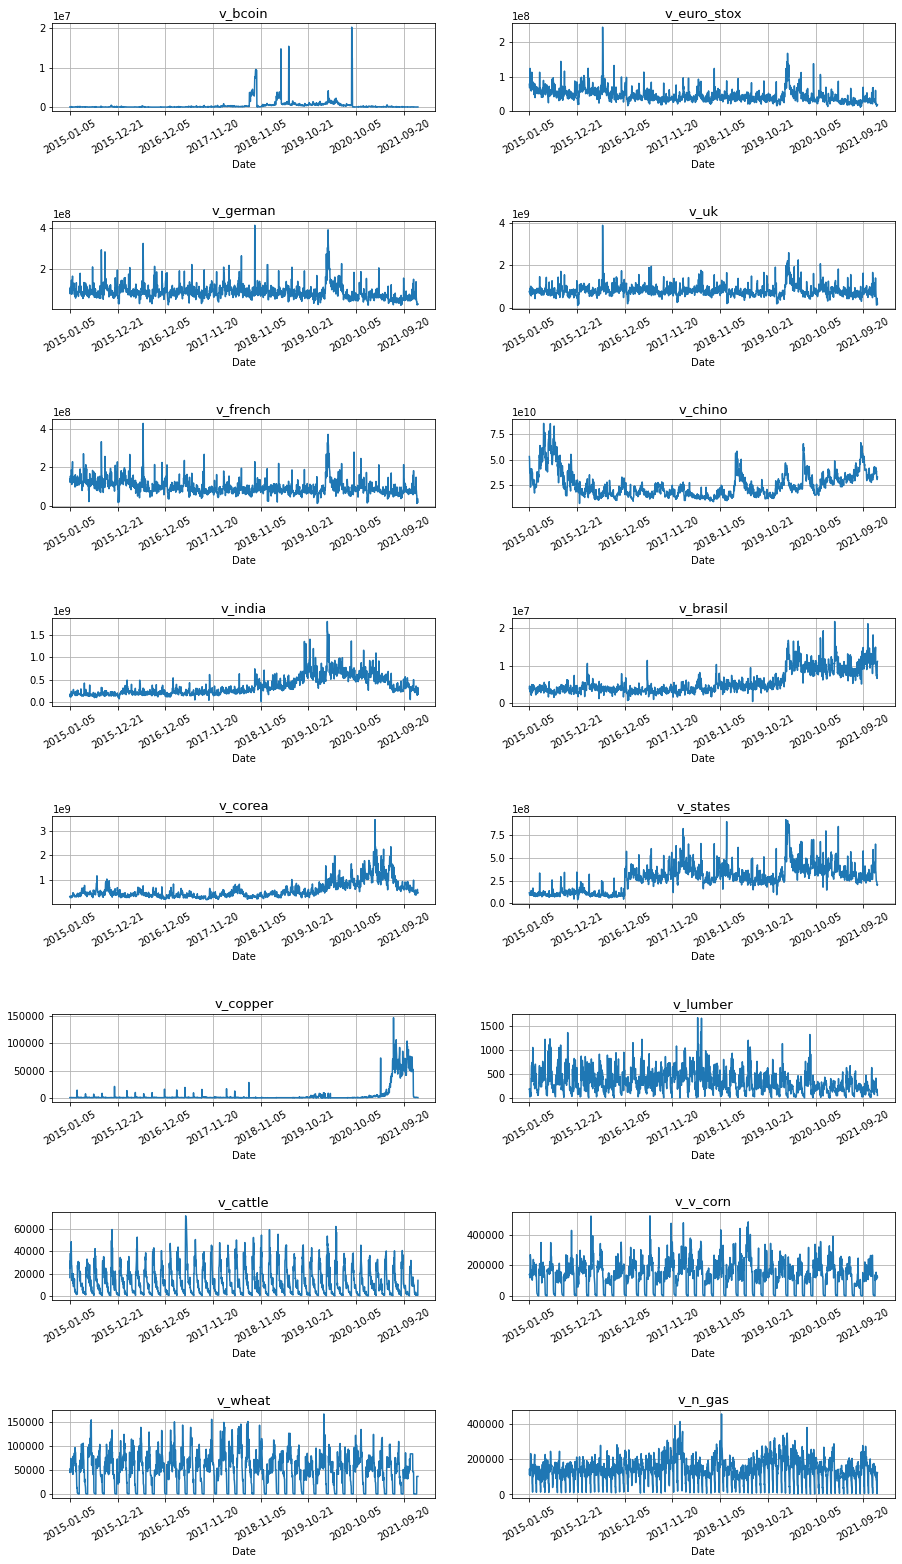

In [39]:
plt.figure(figsize =(15, 60))

for i, feature in enumerate(v_mod):
    plt.subplot(18, 2, i+1)
    df[v_mod[i]].plot()
    plt.title(v_mod[i], fontsize=13)
    plt.grid(which='both')
    plt.xticks(rotation =30)
    
plt.subplots_adjust(left=0.12, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace= 1.25)

plt.show()
# excluded euro and crude oil 

In [ ]:
# correlation in volumes

In [65]:
df.columns

Index(['euro', 'bcoin', 'euro_stox', 'german', 'uk', 'french', 'chino',
       'india', 'brasil', 'corea', 'states', 'copper', 'lumber', 'cattle',
       'corn', 'wheat', 'crude', 'n_gas', 'carbon', 'v_euro', 'v_bcoin',
       'v_euro_stox', 'v_german', 'v_uk', 'v_french', 'v_chino', 'v_india',
       'v_brasil', 'v_corea', 'v_states', 'v_copper', 'v_lumber', 'v_cattle',
       'v_v_corn', 'v_wheat', 'v_crude', 'v_n_gas', 'v_carbon'],
      dtype='object')

In [66]:
v_mod.append('v_carbon')
volume = df[v_mod]

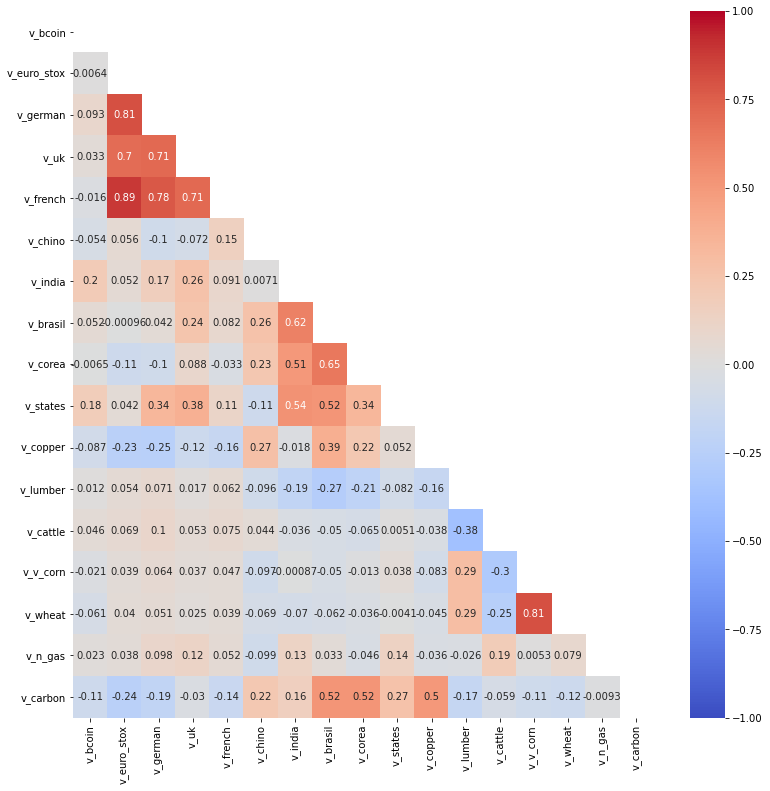

In [75]:
plt.figure(figsize =(13, 13))
upp_mat = np.triu(volume.corr())
sns.heatmap(volume.corr(),  vmin=-1, vmax= +1, annot=True, cmap = 'coolwarm', mask = upp_mat)
plt.show()

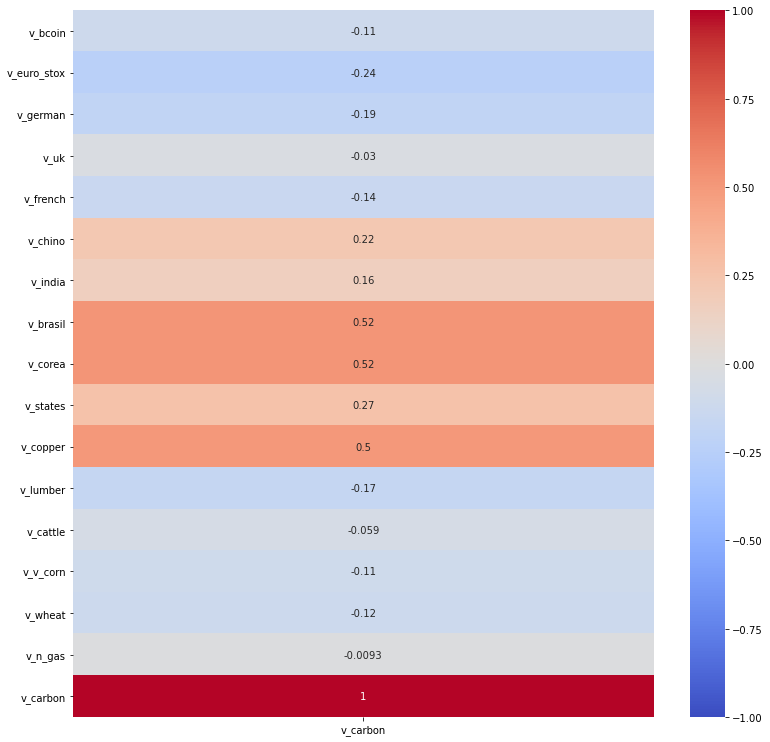

In [80]:
plt.figure(figsize =(13, 13))
sns.heatmap(volume.corr()[['v_carbon']],  vmin=-1, vmax= +1, annot=True, cmap = 'coolwarm')
plt.show()